<a href="https://colab.research.google.com/github/thravt/AIProjectsHomework/blob/main/HW5_Task1_Tyler_Thraves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In your project, you will pick an image dataset to solve a classification task. Provide a link to
your dataset.**

For my image dataset/problem, I decided to go for a card classifier, with the given dataset https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification. I chose this dataset due to the uniformity in the image size, as well as the size of the dataset, which I feel should be large enough to be accurate, but not too large for my computer. To make sure there's enough data for each class, I will be classifying rank, regardless of suit.

**Part 1 (10 points): This step involves downloading, preparing, and visualizing your
dataset. Create a convolutional base using a common pattern: a stack of Conv and
MaxPooling layers. Depending on the problem and the dataset you must decide what
pattern you want to use (i.e., how many Conv layers and how many pooling layers).
Please describe why you chose a particular pattern. Add the final dense layer(s).
Compile and train the model. Report the final evaluation and describe the metrics.**

Basic code for downloading data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
! pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp /kaggle.json ~/.kaggle/

cp: cannot stat '/kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets download gpiosenka/cards-image-datasetclassification

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 99% 383M/385M [00:16<00:00, 28.3MB/s]
100% 385M/385M [00:16<00:00, 24.5MB/s]


In [8]:
! unzip cards-image-datasetclassification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/jack of spades/059.jpg  
  inflating: train/jack of spades/060.jpg  
  inflating: train/jack of spades/061.jpg  
  inflating: train/jack of spades/062.jpg  
  inflating: train/jack of spades/063.jpg  
  inflating: train/jack of spades/064.jpg  
  inflating: train/jack of spades/065.jpg  
  inflating: train/jack of spades/066.jpg  
  inflating: train/jack of spades/067.jpg  
  inflating: train/jack of spades/068.jpg  
  inflating: train/jack of spades/069.jpg  
  inflating: train/jack of spades/070.jpg  
  inflating: train/jack of spades/071.jpg  
  inflating: train/jack of spades/072.jpg  
  inflating: train/jack of spades/073.jpg  
  inflating: train/jack of spades/074.jpg  
  inflating: train/jack of spades/075.jpg  
  inflating: train/jack of spades/076.jpg  
  inflating: train/jack of spades/077.jpg  
  inflating: train/jack of spades/078.jpg  
  inflating: train/jack of spades/079.jpg  
  inflating: train/jack o

In [9]:
dataframe = pd.read_csv('cards.csv')

In [10]:

dataframe = dataframe.drop('class index', axis = 1)
dataframe = dataframe.drop('labels', axis = 1)
dataframe = dataframe.drop('data set', axis = 1)
print(dataframe)

                       filepaths card type
0     train/ace of clubs/001.jpg       ace
1     train/ace of clubs/002.jpg       ace
2     train/ace of clubs/003.jpg       ace
3     train/ace of clubs/004.jpg       ace
4     train/ace of clubs/005.jpg       ace
...                          ...       ...
8150   valid/two of spades/1.jpg       two
8151   valid/two of spades/2.jpg       two
8152   valid/two of spades/3.jpg       two
8153   valid/two of spades/4.jpg       two
8154   valid/two of spades/5.jpg       two

[8155 rows x 2 columns]


In [11]:
indices_to_drop = dataframe[dataframe['filepaths'].str.contains('output')].index
dataframe = dataframe.drop(indices_to_drop)
indices_to_drop = dataframe[dataframe['filepaths'].str.contains('joker')].index
dataframe = dataframe.drop(indices_to_drop)

In [12]:
dataframe['card type'] = dataframe['card type'].replace({'ace' : 1, 'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'seven' : 7, 'eight' : 8, 'nine' : 9, 'ten' : 10, 'jack' : 11, 'queen' : 12, 'king' : 0})

<ipython-input-12-f8e07607ed7e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['card type'] = dataframe['card type'].replace({'ace' : 1, 'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'seven' : 7, 'eight' : 8, 'nine' : 9, 'ten' : 10, 'jack' : 11, 'queen' : 12, 'king' : 0})


In [13]:
Xlinks = dataframe.drop('card type', axis = 1).values
y = dataframe['card type'].values

In [ ]:
print(Xlinks[120])
print(y[120])

['train/ace of diamonds/001.jpg']
1


I originally was going to do the train-test split after converting the links to images, but given that it crashed, I'll do so beforehand.

In [14]:
from sklearn.model_selection import train_test_split

In [ ]:
Xl_train, Xl_test, y_train, y_test = train_test_split(Xlinks, y, test_size=0.1, random_state=64)

In [ ]:
from PIL import Image
size = (56, 56)
X_train = np.zeros((len(Xl_train), np.array(Image.open(Xlinks[0][0]).resize(size).convert("RGB")).shape[0], np.array(Image.open(Xlinks[0][0]).resize(size).convert("RGB")).shape[1], 3))
for i in range (len(X_train)):
  X_train[i] = np.array(Image.open(Xl_train[i][0]).resize(size).convert("RGB")) / 255.0
X_test = np.zeros((len(Xl_test), np.array(Image.open(Xlinks[0][0]).resize(size).convert("RGB")).shape[0], np.array(Image.open(Xlinks[0][0]).resize(size).convert("RGB")).shape[1], 3))
for i in range (len(X_test)):
  X_test[i] = np.array(Image.open(Xl_test[i][0]).resize(size).convert("RGB")) / 255.0

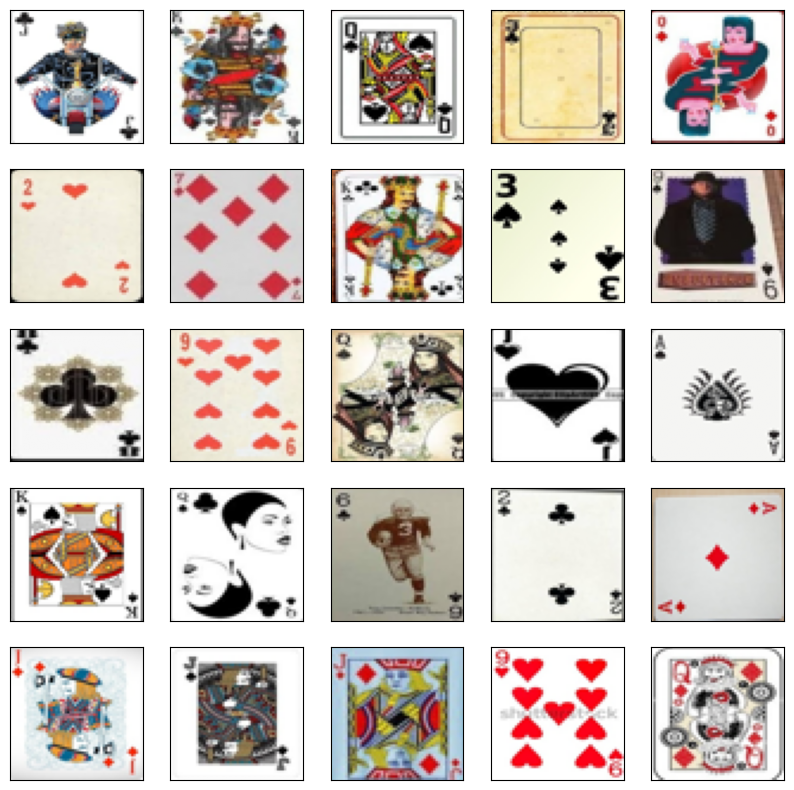

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.show()

In [ ]:
print(X_train[i].shape)

(56, 56, 3)


To make this model, I will use 3 sets of conv to maxpool layers, followed by a dense layer. I figure 3 sets is a good fit, as the images are relatively small, and it should be able to capture all the features. I will use a 3 by 3 matrix for the conv2d layers, and a 2 by 2 for the maxpool. This way, it should be able to capture enough information about the layers, and be large enough to give useful info. I'll start with 16 filters, then increase to 32 after the first set. The dense layer has 13 outputs to handle the 13 possible values.

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(56, 56, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(13))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 13)                  │          10,413 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,749 (96.68 KB)

 Trainable params: 24,749 (96.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

The tensorflow documentation only used 10 epochs for training, so I'll start there and train more if the accuracy isn't good enough already.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.3757 - loss: 1.9034
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.6703 - loss: 1.1044
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.7079 - loss: 0.9726
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.7400 - loss: 0.8519
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - accuracy: 0.7701 - loss: 0.7488
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.7906 - loss: 0.6876
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.8078 - loss: 0.6152
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.8345 - loss: 0.5418
Epoch 9/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8566 - loss: 0.4669
Epoch 10/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8696 - loss: 0.4240


26/26 - 1s - 27ms/step - accuracy: 0.7210 - loss: 1.1447


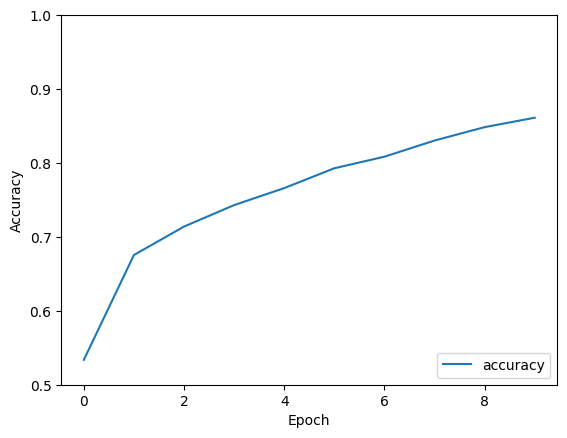

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
print(test_loss)
print(test_acc)

1.1446613073349
0.7210460901260376


I am very pleased. I didn't mention it earlier as I had to go back and change things, but I had to go back and resize all the images by a factor of 4 to get things to work, so I'm glad that it ended up with a pretty great accuracy and loss, even in the test set, showing that the model isn't overfitting the training set, even with the high accuracy. I used those metrics as I figured having a good accuracy is important for a classification task, and it would be more informative than precision or recall.

**Part 2 (10 points): The following models are widely used for transfer learning because of their performance and architectural innovations:**
1. VGG (e.g., VGG16 or VGG19).
2. GoogLeNet (e.g., InceptionV3).
3. Residual Network (e.g., ResNet50).
4. MobileNet (e.g., MobileNetV2)

**Choose any one of the above models to perform the classification task you did in Part 1.
Evaluate the results using the same metrics as in Part 1. Are there any differences? Why
or why not? Describe in detail.**

I've decided to use VGG16. The good news is that the images are already the proper size. The bad news is that that proper size has crashed my system before. After attempting it, it did indeed crash. I'll try to see if I can get it to work with the smaller size.

In [ ]:
from keras.applications.vgg16 import VGG16
# load the model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(56, 56, 3))

In [ ]:
Xlinks = dataframe.drop('card type', axis = 1).values
y = dataframe['card type'].values

I've heard I'll need to freeze the original model layers, so I'll do that.

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

This should get the model ready for the predictions.

In [ ]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(13)(x)

This should link the base model and the final predictor.

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

It's a big process to preprocess all the images, so I'll need to use functions to get it all done.

In [ ]:
def preprocess_image(image_path, target_size=(56, 56)):
    img = Image.open(image_path).resize(target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    return img_array


In [ ]:
def process_image_array(image_paths):
    processed_images = [preprocess_image(path[0]) for path in image_paths]
    return np.vstack(processed_images)

In [15]:
from PIL import Image

In [ ]:
X = process_image_array(Xlinks)

In [ ]:
print(X[0])

[[[ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  ...
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]]

 [[ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  ...
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]]

 [[ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  ...
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]
  [ 151.061      138.22101    131.32     ]]

 ...

 [[ -97.939     -105.779     -111.68     ]
  [ -96.939     -104.779     -111.68     ]
  [ -96.939     -104.779     -110.68     ]
  ...
  [ 151.061      138.22101    131.32     ]
  [ 151.061      1

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 56, 56, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 56, 56, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 56, 56, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 14, 14, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,253,325 (58.19 MB)

 Trainable params: 538,637 (2.05 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Ok, I know that the model is pre-trained, but all these parameters still make me worried my laptop's about to explode.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=64)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 261s 574ms/step - accuracy: 0.3404 - loss: 6.2967
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 243s 531ms/step - accuracy: 0.6632 - loss: 1.0851
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 264s 535ms/step - accuracy: 0.7871 - loss: 0.6590
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 262s 535ms/step - accuracy: 0.8349 - loss: 0.5063
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 266s 544ms/step - accuracy: 0.8627 - loss: 0.4651
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 243s 539ms/step - accuracy: 0.8708 - loss: 0.4175
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 263s 541ms/step - accuracy: 0.8903 - loss: 0.3840
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 261s 539ms/step - accuracy: 0.8781 - loss: 0.4238
Epoch 9/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 262s 538ms/step - accuracy: 0.8902 - loss: 0.3738
Epoch 10/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 265s 546ms/step - accuracy: 0.9232 - loss: 0.2717


Ok, so it's not crashing, but it seem like it'll take an hour or so to run. I'll run it until completion, then get back.

Update: model has finished running. Time to look at the accuracy graph:

26/26 - 30s - 1s/step - accuracy: 0.6152 - loss: 2.5771


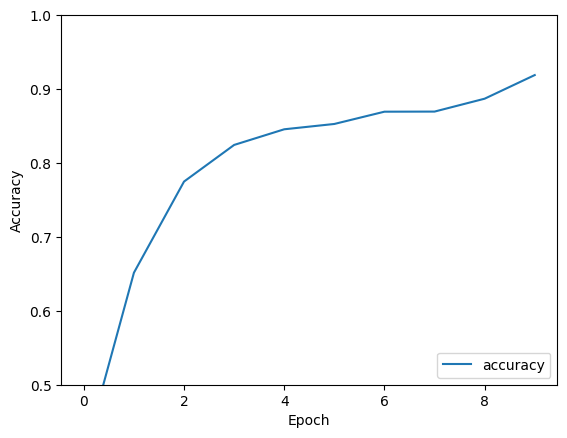

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
print(test_loss)
print(test_acc)

2.5770599842071533
0.6151930093765259


Ok, so the model performed better on the training set, but worse on the test set. It also seemed to reach a higher accuracy in less epochs, but then even started to decrease in accuracy a little near the end. I'm thinking it would've been better for the test set if I had done early stopping, but I didn't know how to do that without risking crashing the model. It seems the pre-training helped give it an initial boost, but made each loop take way longer, and the continued training at a high accuracy caused overfitting to try and further improve.

**Part 3 (10 points): Use data augmentation to increase the diversity of your dataset by
applying random transformations such as image rotation (you can use any other
technique as well). Repeat the process from part 1 with this augmented data. Did you
observe any difference in results? Why or why not?**

I will be using 90 degree rotations in order to augment my data. I don't want to use mirroring as that might cause issues with recognizing the numbers, as a mirrored 2 may look like a 5, or similar issues may occur.

In [21]:
print(len(dataframe))

8029


In [22]:
Xlinks = dataframe.drop('card type', axis = 1).values
y = dataframe['card type'].values

In [48]:
size = (56, 56)

X_images = []

for i in range (len(Xlinks)):
  X_images.append(Image.open(Xlinks[i][0]).resize(size).convert("RGB"))
print(len(X_images))


8029


In [49]:
print(X_images[0])

<PIL.Image.Image image mode=RGB size=56x56 at 0x7CBD3AE5F510>


In [50]:
X_images90 = X_images.copy()
for i in range(len(X_images)):
  X_images90[i] = X_images90[i].rotate(90)

In [51]:
X_images = X_images + X_images90

In [52]:
X_images180 = X_images.copy()
for i in range(len(X_images)):
  X_images180[i] = X_images180[i].rotate(180)

In [53]:
X_images = X_images + X_images180

In [54]:
X = np.zeros((len(X_images), np.array(X_images[0]).shape[0], np.array(X_images[0]).shape[1], 3))
for i in range (len(X_images)):
  X[i] = np.array(X_images[i]) / 255.0

In [55]:
print(len(X))

32116


In [39]:
y = np.concatenate((y, y))

In [41]:
y = np.concatenate((y, y))

In [42]:
print(y.shape)

(32116,)


In [57]:
print(y[0], y[8029])

1 1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=64)

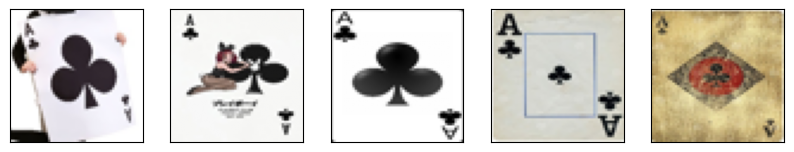

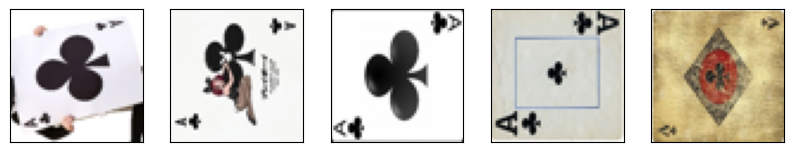

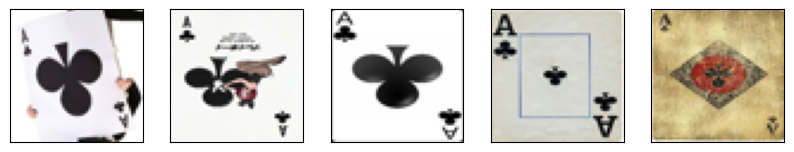

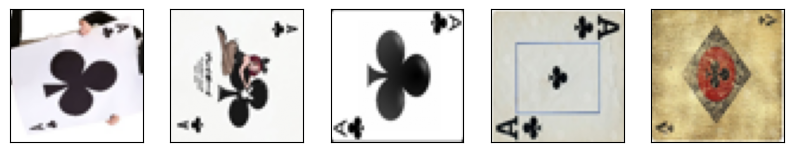

In [60]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i + 8029])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i + 16058])
plt.show()
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i + 24087])
plt.show()


Data has been augmented successfully, time to run the model again.

In [61]:
print(X_train[i].shape)

(56, 56, 3)


In [62]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(56, 56, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(13))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 13)                  │          10,413 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,749 (96.68 KB)

 Trainable params: 24,749 (96.68 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.4615 - loss: 1.6684
Epoch 2/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6958 - loss: 1.0114
Epoch 3/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.7245 - loss: 0.8980
Epoch 4/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7476 - loss: 0.8199
Epoch 5/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.7621 - loss: 0.7647
Epoch 6/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7848 - loss: 0.6942
Epoch 7/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.7985 - loss: 0.6493
Epoch 8/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.8070 - loss: 0.6078
Epoch 9/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.8185 - loss: 0.5782
Epoch 10/10
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8288 - loss: 0.5450


101/101 - 2s - 21ms/step - accuracy: 0.7497 - loss: 0.8779


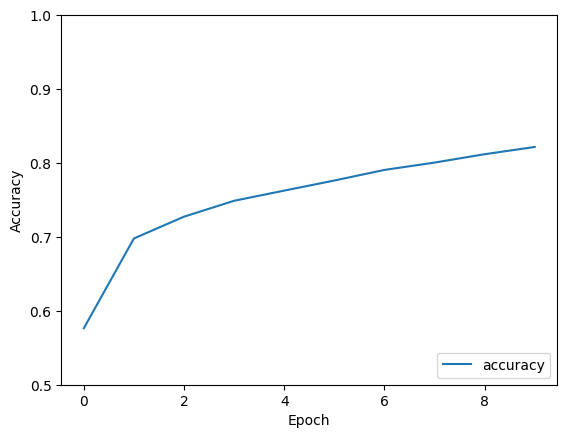

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [67]:
print(test_loss)
print(test_acc)

0.8778716325759888
0.7496886849403381


Adding the augmented data gave a higher single epoch accuracy, but from there it only improved very gradually. The test accuracy was very similar to the test accuracy of the original model, but the loss was noticably lower. The test accuracy is more similar to the training accuracy than the original model, so it seems it might have helped with overfitting. Overall it seemed that it would be more helpful after more epochs, and augmenting data could prevent overfitting with little data.